# Mercado Libre's API playground
First test using 'Metrics' section in API.

Getting visits from multiple items and plotting along time axis.

In [34]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
import pandas as pd

from pandas import Series, DataFrame

In [53]:
# chosen items: MLB695065272, MLB765601179
# since last 365 days

url = "https://api.mercadolibre.com/items/visits/time_window?ids=MLB695065272,MLB765601179&last=365&unit=day" # items hardcoded by now

data = requests.get(url).json()
results = data[0]["results"]

In [54]:
df1 = DataFrame(results)
df1 = df1[["date", "total"]]
df1.head()

,date,total
0,2015-09-12T04:00:00Z,30
1,2015-09-13T04:00:00Z,33
2,2015-09-14T04:00:00Z,40
3,2015-09-15T04:00:00Z,31
4,2015-09-16T04:00:00Z,31


In [55]:
df1.describe()

,total
count,365.000000
mean,137.410959
std,58.432274
min,3.000000
25%,100.000000
50%,129.000000
75%,172.000000
max,329.000000


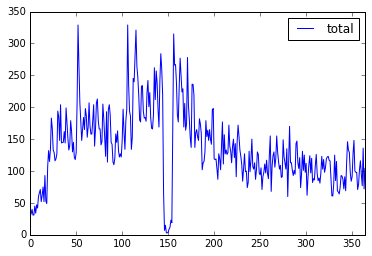

In [56]:
plt.figure()
df1.plot()

In [57]:
results = data[1]["results"] #get the other item data


In [58]:
df2 = DataFrame(results)
df2 = df2[["date", "total"]]
df2.head()

,date,total
0,2015-09-12T04:00:00Z,0
1,2015-09-13T04:00:00Z,0
2,2015-09-14T04:00:00Z,0
3,2015-09-15T04:00:00Z,0
4,2015-09-16T04:00:00Z,0


In [61]:
df = pd.merge(df1, df2, on='date')
df.columns = ["date", "item1", "item2"]
df.head()

,date,item1,item2
0,2015-09-12T04:00:00Z,30,0
1,2015-09-13T04:00:00Z,33,0
2,2015-09-14T04:00:00Z,40,0
3,2015-09-15T04:00:00Z,31,0
4,2015-09-16T04:00:00Z,31,0


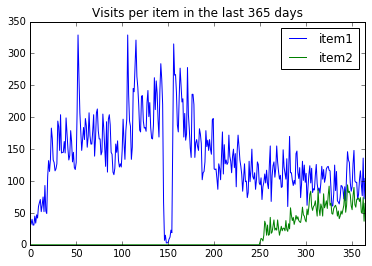

In [67]:
plt.figure()
df.plot(title="Visits per item in the last 365 days")

### Next steps
- Create DataFrame in a loop, by merging dfs from multiple items
- Include calling to a query to be the source of items ids
- Get those ids and order by, say, top 10 to plot